In [39]:
import ast
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


In [2]:
os.getcwd()

'/Users/sauravanchlia/SWM/BotDetectionUsingTransformers/SVMClassification'

In [3]:
df = pd.read_csv("../dataset.csv")

In [4]:
df.head(10)

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,3.982732e+09,3982731976,mcgucket_bot,NaN,A bot that tweets every line said by Fiddlefor...,NaN,1129,7,2,Sat Oct 17 22:35:31 +0000 2015,0,False,23557,en,"{'retweeted': False, 'is_quote_status': False,...",False,False,False,McGucket bot,1
1,8.410000e+17,8.41E+17,BowieK66,NaN,NaN,NaN,0,22,0,13/03/2017 22:21,0,False,1,en,Status(_api=<tweepy.api.API object at 0x101927...,True,True,False,MJ Kuhn,1
2,2.768375e+09,2768374981,ducknoteprice,NaN,NaN,NaN,3,0,3,Mon Aug 25 23:17:59 +0000 2014,0,False,1050,en,{'created_at': 'Fri Feb 26 17:01:15 +0000 2016...,True,False,False,duckNote,1
3,3.304189e+09,3304189373,robotrecipes,robot kitchen,tasty recipes for robot // not for human // a ...,http://t.co/PdagJGqVMR,505,13,49,Sat May 30 23:42:16 +0000 2015,0,False,5109,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,robot recipes,1
4,3.224289e+09,3224289024,everyumlaut,NaN,bot by @dbaker_h,NaN,15,0,11,Sat May 23 14:39:21 +0000 2015,0,False,31365,en-gb,"{u'contributors': None, u'truncated': False, u...",True,False,False,ÌÇvÌÇrÌÀ Ì_mlÌ_Ì_¼Ñ,1
5,7.300000e+17,7.30E+17,glossatory,Australah,SOCIAL ON GLOSSATORY: the branch of the consid...,https://t.co/hcUNcUdlcq,16,1,4,5/11/2016 5:45,0,False,1832,en,"Status(in_reply_to_user_id=None, favorited=Fal...",False,False,False,GLOSSATORY,1
6,8.200000e+17,8.20E+17,Fancypants6047,vancouver,NaN,NaN,41,394,0,13/01/2017 19:37,3,False,4,en,Status(_api=<tweepy.api.API object at 0x101927...,True,False,True,Fancypants,1
7,2.602217e+09,2602217174,Hedgehogize,Moebius,@Hedgehogize me or @Hedgehogize NAME to unlock...,http://t.co/a1UvEiAl3u,549,370,12,Thu Jul 03 20:37:48 +0000 2014,12,False,4658,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,YOU the Hedgehog,1
8,8.330000e+17,8.33E+17,jamieph93986621,NaN,"I wasn't bor ysterday, was born tomorrow",NaN,0,60,0,Sun Feb 19 03:47:42 +0000 2017,0,False,10,en,"{""created_at"": ""Mon Mar 13 02:55:10 +0000 2017...",True,False,False,Jamie Phillips,1
9,8.250000e+17,8.25E+17,NothemDonella,NaN,Your diac No,NaN,0,43,4,Fri Jan 27 15:51:34 +0000 2017,48,False,86,en,"{""created_at"": ""Mon Mar 13 02:52:13 +0000 2017...",True,False,False,Donella Nothem,1


In [9]:
print(ast.literal_eval(df.iloc[0]["status"]).keys())

dict_keys(['retweeted', 'is_quote_status', 'favorite_count', 'retweet_count', 'place', 'in_reply_to_status_id', 'entities', 'geo', 'id_str', 'in_reply_to_screen_name', 'text', 'in_reply_to_user_id_str', 'source', 'truncated', 'in_reply_to_user_id', 'created_at', 'contributors', 'in_reply_to_status_id_str', 'lang', 'id', 'favorited', 'coordinates'])


In [5]:
print(ast.literal_eval(df.iloc[0]["status"]).values())

dict_values([False, False, 0, 0, None, None, {'urls': [], 'user_mentions': [], 'hashtags': [], 'symbols': []}, None, '841319282986237952', None, "It's happening! The End Times! When that machine activates... I gotta get outta town!", None, '<a href="http://twittbot.net/" rel="nofollow">twittbot.net</a>', False, None, 'Mon Mar 13 16:05:22 +0000 2017', None, None, 'en', 841319282986237952, False, None])


In [11]:
df.bot.value_counts()

bot
0    1176
1    1056
Name: count, dtype: int64

In [12]:
df.shape

(2232, 20)

In [6]:
tweet, followers_count, friends_count, verified, statuses_count, default_profile, default_profile_image, has_extended_profile,  bot = [], [], [], [], [], [], [], [], []

for i, row in df.iterrows():
    try:
        _text = ast.literal_eval(row["status"])["text"]
        tweet.append(_text)
        followers_count.append(row["followers_count"])
        friends_count.append(row["friends_count"])
        verified.append(row["verified"])
        statuses_count.append(row["statuses_count"])
        default_profile.append(row["default_profile"])
        default_profile_image.append(row["default_profile_image"])
        has_extended_profile.append(row["has_extended_profile"])
        bot.append(row["bot"])
    except Exception as e:
        pass
    

In [7]:
df_clean = pd.DataFrame(zip(tweet, followers_count, friends_count, verified, statuses_count, default_profile, default_profile_image, has_extended_profile,  bot),
                            columns=["tweet", "followers_count", "friends_count", "verified", "statuses_count", "default_profile", "default_profile_image", "has_extended_profile",  "bot" ])

In [8]:
df_clean.bot.value_counts()

bot
0    646
1    549
Name: count, dtype: int64

In [9]:
df_clean.head(10)

,tweet,followers_count,friends_count,verified,statuses_count,default_profile,default_profile_image,has_extended_profile,bot
0,It's happening! The End Times! When that machi...,1129,7,False,23557,False,False,False,1
1,The average price of duckNote across all excha...,3,0,False,1050,True,False,False,1
2,Gooseberry Plush: Stir fermium and modified at...,505,13,False,5109,False,False,False,1
3,ën̈d̈g̈äm̈ës̈,15,0,False,31365,True,False,False,1
4,"@frickIIILLLYYY Oh, wow! Daddy the Hedgehog is...",549,370,False,4658,False,False,False,1
5,Bored.. I need something to do someone hmu,0,60,False,10,True,False,False,1
6,RT @theviralmeme: me: have a good break\n\nstu...,0,43,False,86,True,False,False,1
7,Time.--6 hours.,102,3,False,10873,True,False,False,1
8,"@wottow a beautiful scene, starring @MM_62_123...",578,17,False,5234,False,False,False,1
9,RT @DrJimmyStar: For great book promotion foll...,1,34,False,98,True,False,False,1


In [10]:
text_transformer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), lowercase=True, max_features=150000)

In [11]:
df_train, df_test = train_test_split(df_clean,
                                    stratify=df_clean["bot"], 
                                    test_size=0.25)

In [12]:
df_train.shape, df_test.shape

((896, 9), (299, 9))

In [13]:
df_train.bot.value_counts()

bot
0    484
1    412
Name: count, dtype: int64

In [14]:
df_test.bot.value_counts()

bot
0    162
1    137
Name: count, dtype: int64

In [15]:
tweet_tfidf_train = text_transformer.fit_transform(df_train['tweet'])
tweet_tfidf_test = text_transformer.transform(df_test['tweet'])

In [16]:
tweet_tfidf_train

<896x10281 sparse matrix of type '<class 'numpy.float64'>'
	with 13130 stored elements in Compressed Sparse Row format>

In [17]:
clf = LogisticRegression(random_state=0).fit(tweet_tfidf_train, df_train["bot"])

In [18]:
test_preds = clf.predict(tweet_tfidf_test)

In [19]:
_dummy = pd.DataFrame(test_preds, columns=['label'])
_dummy["label"].value_counts()

label
0    256
1     43
Name: count, dtype: int64

In [35]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import seaborn as sn


In [22]:
accuracy_score(df_test["bot"],test_preds)

0.6120401337792643

In [38]:
test_preds

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0])

/var/folders/vx/c0vs5l7n3mb0v0mzrrq7hsb00000gn/T/ipykernel_53584/107578532.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(["","human", "bot"])
/var/folders/vx/c0vs5l7n3mb0v0mzrrq7hsb00000gn/T/ipykernel_53584/107578532.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(["","human", "bot"])


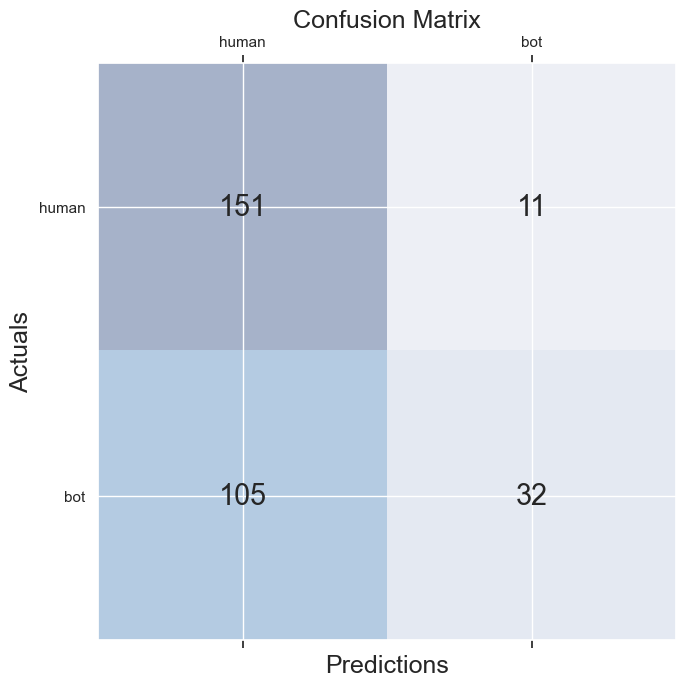

In [89]:
cm = confusion_matrix(df_test["bot"], test_preds)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.xaxis.set_ticklabels(["","human", "bot"])
ax.yaxis.set_ticklabels(["","human", "bot"])

ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.savefig("../Evaluation Graphs/LR_Confusion_Matrix.png")
plt.show()


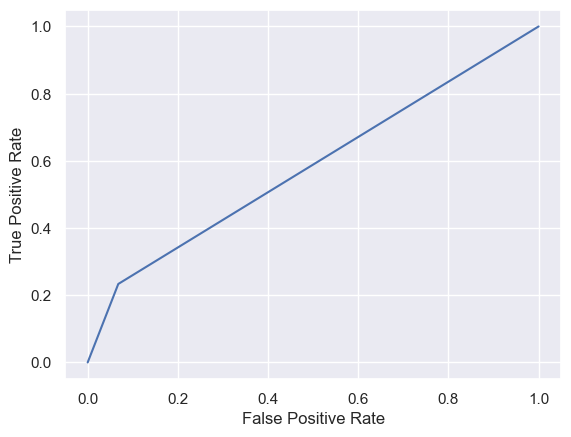

In [90]:
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, _ = metrics.roc_curve(df_test["bot"],test_preds)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("../Evaluation Graphs/LR_ROC_AUC.png")
plt.show()



In [24]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(tweet_tfidf_train, df_train["bot"])

#Predict the response for test dataset
y_pred = clf.predict(tweet_tfidf_test)

In [25]:
accuracy_score(df_test["bot"],y_pred)

0.7090301003344481

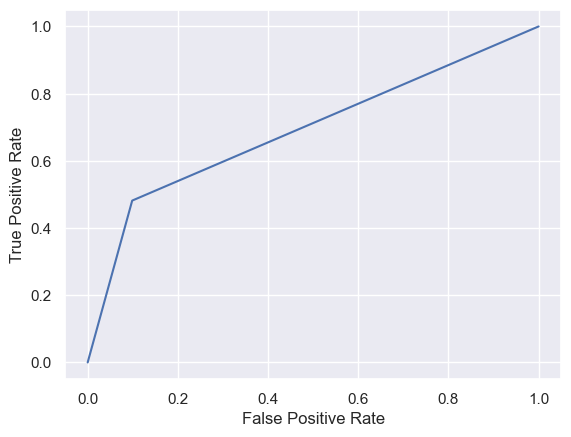

In [91]:
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, _ = metrics.roc_curve(df_test["bot"],y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("../Evaluation Graphs/SVM_ROC_AUC.png")

plt.show()


/var/folders/vx/c0vs5l7n3mb0v0mzrrq7hsb00000gn/T/ipykernel_53584/2010156483.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(["","human", "bot"])
/var/folders/vx/c0vs5l7n3mb0v0mzrrq7hsb00000gn/T/ipykernel_53584/2010156483.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(["","human", "bot"])


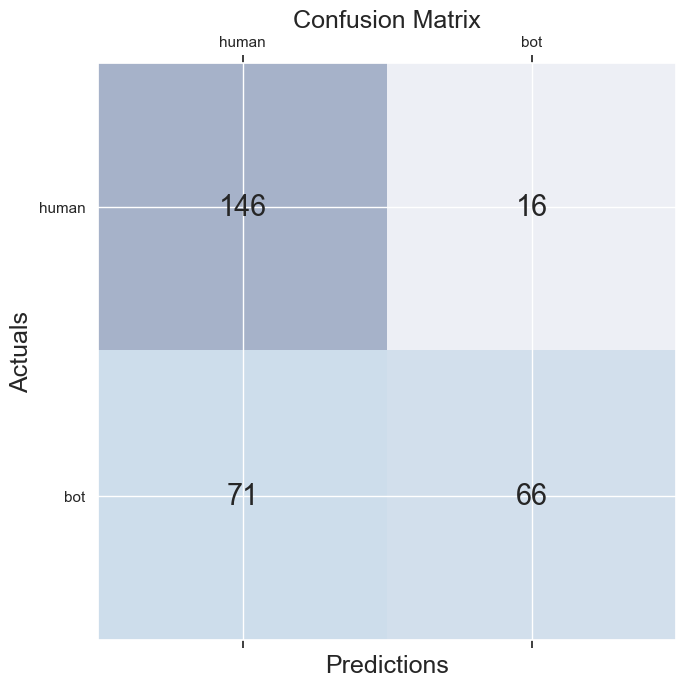

In [92]:
cm = confusion_matrix(df_test["bot"], y_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.xaxis.set_ticklabels(["","human", "bot"])
ax.yaxis.set_ticklabels(["","human", "bot"])

ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.savefig("../Evaluation Graphs/SVM_Confusion_Matrix.png")
plt.show()


In [66]:
tweet_tfidf_test[1]

<1x10281 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [70]:
demo_test_label = 


In [83]:
def demo_func(index):
    text_transformer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), lowercase=True, max_features=150000)
    tweet_tfidf_demo_train = text_transformer.fit_transform(df_train['tweet'])
    tweet_tfidf_demo = text_transformer.transform(df_test.iloc[[index]]["tweet"])
    demo_test_label = df_test.iloc[[index]]["bot"]
    demo_pred = clf.predict(tweet_tfidf_demo)
    print(f"Test Index : {index}")
    print(f"Input {df_test.iloc[index]}")
    print(f"Model prediction: {demo_pred} , Actual Label: {demo_test_label}")

In [84]:
demo_func(1)

Test Index : 1
Input tweet                    Since my master is too lazy to update me, I ma...
followers_count                                                       1786
friends_count                                                         2525
verified                                                             False
statuses_count                                                      136932
default_profile                                                      False
default_profile_image                                                False
has_extended_profile                                                 False
bot                                                                      1
Name: 251, dtype: object
Model prediction: [1] , Actual Label: 251    1
Name: bot, dtype: int64


In [85]:
demo_func(10)

Test Index : 10
Input tweet                    "Super Mario Ran" https://t.co/1wati8DWXU
followers_count                                               3749
friends_count                                                    1
verified                                                     False
statuses_count                                                7931
default_profile                                              False
default_profile_image                                        False
has_extended_profile                                         False
bot                                                              0
Name: 617, dtype: object
Model prediction: [0] , Actual Label: 617    0
Name: bot, dtype: int64


In [87]:
demo_func(176)

Test Index : 176
Input tweet                    Medvedeva (RUS) and Canadians Chan, Duhamel/Ra...
followers_count                                                       1784
friends_count                                                           43
verified                                                             False
statuses_count                                                         389
default_profile                                                      False
default_profile_image                                                False
has_extended_profile                                                 False
bot                                                                      1
Name: 52, dtype: object
Model prediction: [0] , Actual Label: 52    1
Name: bot, dtype: int64
